## Observations and Insights

The three observations I made in this are:

1. The difference between the drug regimen used on the most mice and the regimen with the least mice was a large difference. Capomulin had what looks to be over 250 mice in its study, while Propriva had just over 150. While that does not indicate any variation on the results we got, that does mean the sample size was significantly larger and would more than likely produce a result that may be more accurate. 

2. The ratio between male and female mice was almost exact. I am unsure of the natural difference in mice on male to female ratios, but I would assume this is a good thing since nature randomly chooses the sex of a mammal. 

3. It may be good to look at why Ramocaine had so many fewer data points than the rest of the drugs. What caused this to happen and was there a way to prevent that moving forward?

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_combined = pd.merge(mouse_metadata, study_results, on="Mouse ID", how = "outer")
mouse_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
drug_mean = mouse_combined.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
drug_median = mouse_combined.groupby(["Drug Regimen"]).median() ['Tumor Volume (mm3)']
drug_variance = mouse_combined.groupby(["Drug Regimen"]).var() ['Tumor Volume (mm3)']
drug_std = mouse_combined.groupby(["Drug Regimen"]).std() ['Tumor Volume (mm3)']
drug_summary = pd.DataFrame({'Mean': drug_mean, "Median": drug_median, "Variance": drug_variance, "Standard Deviation": drug_std})
drug_summary

,Mean,Median,Variance,Standard Deviation
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.322552,50.854632,42.351070,6.507770
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


## Bar plots

Text(0, 0.5, 'Number of Mice')

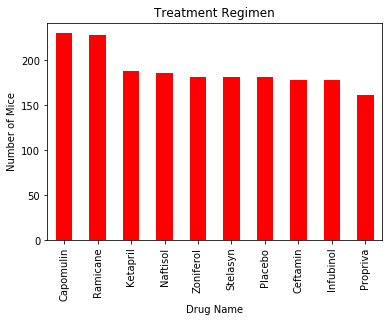

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
number_of_mice = mouse_combined["Drug Regimen"].value_counts()
pandas_bar = number_of_mice.plot(kind="bar", facecolor = "red")

pandas_bar

plt.title("Treatment Regimen")
plt.xlabel("Drug Name")
plt.ylabel("Number of Mice")

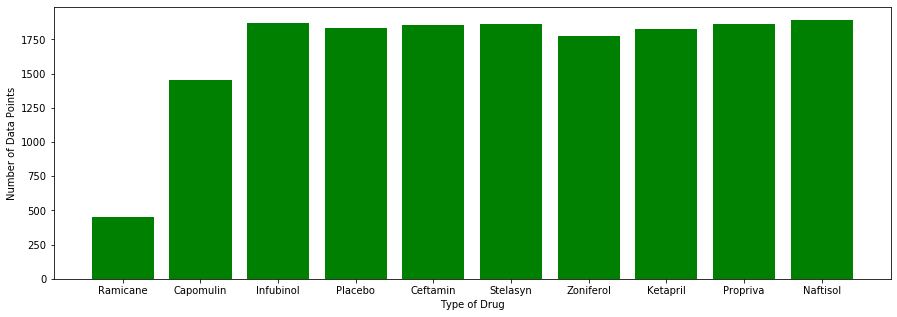

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(mouse_combined))


plt.figure(figsize=(15,5))
plt.bar(mouse_combined["Drug Regimen"], x_axis, color = "green", align = "center")
plt.xlabel("Type of Drug")
plt.ylabel("Number of Data Points")
plt.show()

## Pie plots

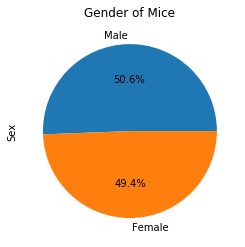

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_of_mice = mouse_combined["Sex"].value_counts()
pandas_pie = gender_of_mice.plot(kind = "pie", autopct = "%1.1f%%")

plt.title("Gender of Mice")
pandas_pie

Text(0.5, 1.0, 'Gender of Mice')

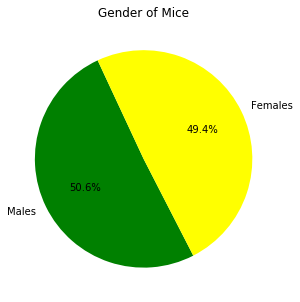

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode = (0, 0)
colors = ["green", "yellow"]
labels = ["Males", "Females"]
plt.figure(figsize=(10,5))
plt.pie(gender_of_mice, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", startangle = 115)
plt.title("Gender of Mice")

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
each_mouse = mouse_combined.groupby(["Mouse ID"]).max()
each_mouse = each_mouse.reset_index()
tumor_volume_df = each_mouse[['Mouse ID','Timepoint']].merge(mouse_combined,on=['Mouse ID','Timepoint'],how="left")
ceftamin = tumor_volume_df.loc[tumor_volume_df["Drug Regimen"]== "Ceftamin"]["Tumor Volume (mm3)"]
ramicane = tumor_volume_df.loc[tumor_volume_df["Drug Regimen"]== "Ramicane"]["Tumor Volume (mm3)"]
capomulin = tumor_volume_df.loc[tumor_volume_df["Drug Regimen"]== 'Capomulin']['Tumor Volume (mm3)']
propriva = tumor_volume_df.loc[tumor_volume_df['Drug Regimen']== 'Propriva']['Tumor Volume (mm3)']



In [8]:
# Quantitatively determine ceftamin outliers
cef_quartiles = ceftamin.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
print(f"Ceftamin potential outliers: {ceftamin.loc[(ceftamin < cef_lower_bound) | (ceftamin > cef_upper_bound)]}")

Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [9]:
# Quantitatively determine capomulin outliers
cap_quartiles = capomulin.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Capomulin potential outliers: {capomulin.loc[(capomulin < cap_lower_bound) | (capomulin > cap_upper_bound)]}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [10]:
# Quantitatively determine ramicane outliers
ram_quartiles = ramicane.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Ramicane potential outliers: {ramicane.loc[(ramicane < ram_lower_bound) | (ramicane > ram_upper_bound)]}")

Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [11]:
# Quantitatively determine propriva outliers
pro_quartiles = propriva.quantile([.25,.5,.75])
pro_lowerq = pro_quartiles[0.25]
pro_upperq = pro_quartiles[0.75]
pro_iqr = pro_upperq-pro_lowerq
pro_lower_bound = pro_lowerq - (1.5*pro_iqr)
pro_upper_bound = pro_upperq + (1.5*pro_iqr)
print(f"Propriva potential outliers: {propriva.loc[(propriva < pro_lower_bound) | (propriva > pro_upper_bound)]}")

Propriva potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


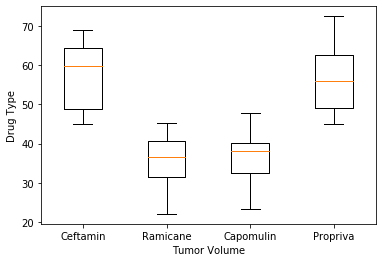

In [12]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([ceftamin, ramicane, capomulin, propriva], labels =["Ceftamin", "Ramicane", "Capomulin", "Propriva"])
plt.ylabel("Drug Type")
plt.xlabel("Tumor Volume")
plt.show()

## Line and scatter plots

In [13]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

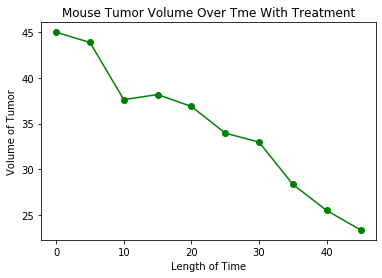

In [14]:
mouse_s185 = mouse_combined.loc[mouse_combined["Mouse ID"]== "s185"]
mouse_time = mouse_s185["Timepoint"]
mouse_tumor = mouse_s185["Tumor Volume (mm3)"]
volume_plot = plt.plot(mouse_time, mouse_tumor, marker = "o", color = "green")

plt.xlabel ("Length of Time")
plt.ylabel ("Volume of Tumor")
plt.title ("Mouse Tumor Volume Over Tme With Treatment")
plt.show()

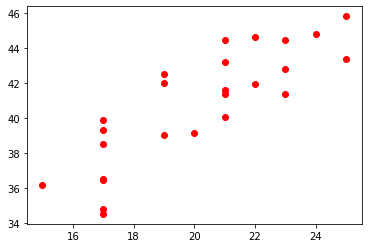

In [15]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulindf = mouse_combined.loc[mouse_combined["Drug Regimen"] == "Capomulin"]
mouseid_group = capomulindf.groupby(["Mouse ID"]).mean()
mouse_weight = mouseid_group["Weight (g)"]
tumor_v = mouseid_group["Tumor Volume (mm3)"]
scatter_plot = plt.scatter(mouse_weight, tumor_v, marker = "o", color = "red")
plt.show()

In [16]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the 
#Capomulin regimen
mweight = capomulindf.iloc[:,4]
avg_tumor_vol = capomulindf.iloc[:,6]
correlation = st.pearsonr(mweight,avg_tumor_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.53


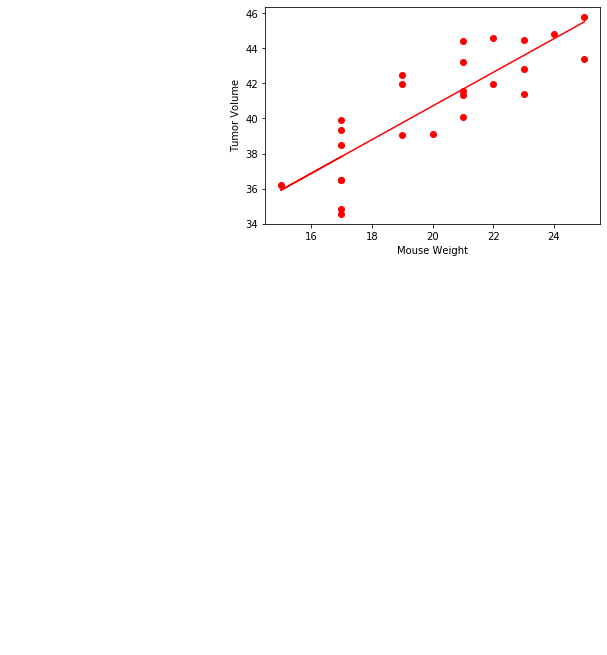

In [17]:
# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(mweight, avg_tumor_vol)
regress_values = mweight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
scatter_plot = plt.scatter(mouse_weight, tumor_v, marker = "o", color = "red")
plt.plot(mweight,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.show()